# Monte Carlo Methods

### Last Class
- Kernel Density Functions

### Goals for Today
- Define uncertainty analysis
- Implement Monte Carlo uncertainty analysis in a mathematical model
- Apply Monte Carlo uncertainty analysis to deterministic models

### Pre-Lecture Activities

- Read the overview on Monte Carlo Uncertainty Analysis below.

In [29]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import scipy.integrate as spi
import scipy.optimize as spo
%matplotlib inline


print("packages imported")

packages imported


### Monte Carlo Uncertainty Analysis Overview

#### Preliminaries
Many of the models we have discussed or simulated require input parameters, which are often measured quantities. Measured quantities are often said to have a level of uncertainty associated with them. Even if the measurement is *perfectly* done, there still exists an uncertainty with the result (e.g., perhaps the way we are measuring the quantity is inaccurate or the tools we are using to measure have uncertainty associated with them).

For example, chemistry labs will often have a tabulated list of the lab equipment which includes the uncertainty associated with each device or in other words how "accurate" we can expect the measurement to be if it was *perfectly* done. A couple of instruments with different volumes are summarized below.

|Instrument| Volume (mL) | Uncertainty (mL)|
|----------|-------------|-----------------|
|Volumetric Flask| 100 |$\pm 0.08$ |
|                | 50 | $\pm 0.05$ |
| Burette        | 25 | $\pm 0.03$ |
|                | 20 | $\pm 0.02$ |
 
Notice here that for each of these instruments, there is a $\pm$ mL value that is associated with the measurement. This is the level of uncertainty associated with using such instruments in experiements -- so if we were using a volumetric flask to measure 100mL of solution, then our measurement is really $100 \pm 0.08$mL.   

The level of uncertainty can influence the output of any model we contruct.  We would like a method to investigate how uncertainty can affect modelling. This is where Monte Carlo Uncertainty Analysis comes in. 

#### Uncertainty Analysis
One tactic that is generally implemented is to make multiple measurements of the same quantity.  The more times we can make measurements of a quantity the more precise we can be about the value.  One issue with this is that measuring a quantity multiple times may result in us getting a range of values for the quantity.

Let's suppose we are measuring the distance between the HEBB and MATH buildings.  If we each take a measurement of the distance, we would find that we would end up with varying distance measurements. We could take our individual results and find the average of the values and the variance between the measurements, however, we still have a range of values for our measurement of the distance. Even if we are individually being careful with how we are taking the distance measurement, there is still some *random* error that is associated with our distance. (By random error here we mean that there will be measurements that both over- and underestimate the true value, and hence, on average will cancel out). If we were to take a lot of measurements (i.e., on the order of 100s or 1000s), we would see that the Law of Large numbers takes over, and our distribution of results will begin to look like a normal curve. *Here, it is important to note that we are only considering random errors here.  Non-random errors may lead to bias or non-normal results.*

However, to make multiple measurements and form a distribution of the results may not be feasible for some settings.  In some instances, it can be time consuming and/or costly to recreate measurements, particularly in labs. This is where Monte Carlo comes in!  We know our measurements will have some uncertainty associated with them, and we want to determine how this uncertainty affects the output of the model.  The general strategy is outlined below.


Let $x$ be the measured quantity with uncertainty $c$; i.e., $x \pm c$. 

1. Define a random variable $\hat{x} = x + \varepsilon$, where $\varepsilon$ is a normally distributed random variable with mean $0$ and standard deviation $c$. 
2. Solve the model with $\hat{x}$.
3. Repeat until the desired number of simulations is met. 
4. Visualize results. 


#### Example - Uncertainty in racecar velocity
Suppose we wanted to calculate the velocity of a racecar using the formula $v = \frac{d}{t}$, where $v$ is the velocity, $d$ is the distance, and $t$ is the time, and we have the following measurements:

|quantity| value | uncertainty|
|----------|-------------|-----------------|
|distance| 54 m |$\pm 1$ m|
|  time  | 2 s | $\pm 0.1$ s | 

Calculate the velocity of the racecar.  How do you think the uncertainty comes in to play in the velocity calculation? In class, we will simulate the uncertainty using Monte Carlo and compare it to our calculated value.

In [30]:
# define measured values

d = 54
t = 2
# calculate velocity
v = 54/2

In [31]:
# Apply monte carlo to see how uncertainty affects the velocity 

#uncertainty 
d_err = 1
t_err = 0.1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
#here we pick a mean of zero for the noise so that when the "error" is added to our constants
#the average value of the parameter does not change
#we pick the standard deviation to be equal to the size of the error, so that we can "add"
#in the variation in the parameter's value due to the uncertainty
d_mc = d + np.random.normal(loc=0.0, scale=d_err,size=N)
t_mc = t + np.random.normal(loc=0.0, scale=t_err,size=N)

v_mc = d_mc/t_mc

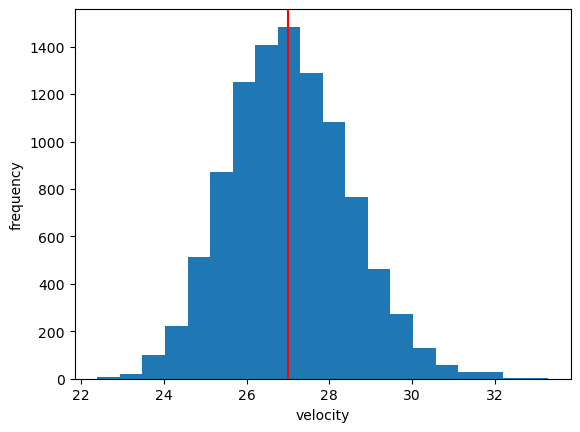

In [32]:
plt.hist(v_mc,bins = 20)
plt.axvline(x = v, color = 'r') #vertical line for exact value
plt.xlabel('velocity')
plt.ylabel('frequency')
plt.show()

Here, we have created a distribution of the velocity of the racecar utilizing the known uncertainty in the measured quantities. Notice how the value we calculated without the uncertainty is sitting at the mean value. This is expected, since the values we used to calculate the velocity are *in the middle* of the uncertainty interval given (i.e., the uncertainty is normally distributed with **zero** mean). 

If we were to go and measure the velocity of the racecar under these conditions, we would find that on average the velocity would be 27 m/s.  However, given our distribution we may measure a velocity as high as 33 m/s or as low as 23 m/s!

**Remarks**
1. It is important to remember that all measured values have a level of uncertainty attributed to them.  Even computations performed by computers have uncertainty (depending on the number of bits and the program utilized).
2. When modeling, we would like our models to be relatively insensitive to these types of errors.  However, this is not always the case.  Many models are sensitive to parameter uncertainty, and identifying which parameters contribute the most to the insensitivity is a key component of Analyzing and Assessing the model.
3. We choose to simulate with $\hat{x} = x + \varepsilon$ and with $\varepsilon$ normally distributed random variable with mean $0$ and standard deviation equal to the uncertainty level, $c$.  Choosing zero mean for the uncertainty is representative of the system behaving *on average* like the measured value (i.e., we are assuming no other sources of error).  Choosing the variance equal to the uncertainty allows us to see how variations affect the measured value.  We sample from a normal distribution under the assumption that it is equally likely to over- and underestimate a value. 

## Clicker Questions

1. Monte Carlo Uncertainty Analysis looks at the effects of random errors.

   a. True.

   b. False.

   c. Not Sure.

2. To simulate error in a measurement, we simulate the uncertainity with a normal distribution of mean equal to the measurement value.

   a. True.

   b. False.

   c. Not Sure.

3. One of the goals of uncertainity analysis is to identify parameters that can affect the results of the solution. That is, variation in a parameter's value may result in completely different results.

   a. True.

   b. False.

   C. Not Sure.

4. Suppose we have $x = 4$ and know the uncertainty level is $\pm 0.1$.  Then the correct implemtation in python to simulate $1000$ values of $\hat{x}$ is:

   a. `np.random.normal(loc=4, scale=0.1,size=1000)`

   b. `np.random.normal(loc=4, scale=(0.1)**2,size=1000)`

   c. `4 + np.random.normal(loc=0, scale=(0.1)**2,size=1000)`

   d. `4 + np.random.normal(loc=0, scale=0.1,size=1000)`

### Applied Force Uncertainty Analysis

Simulate the uncertainty in the force applied to a wall by throwing a ball against it.  Recall that $F = ma$, where $F$ is force, $m$ is mass, and $a$ is acceleration given by $a = \dfrac{v}{t}$, with $v$ velocity and $t$ time.  We have the following information about the measurements:

|quantity| value | uncertainty|
|----------|-------------|-----------------|
|mass| 0.055 kg |$\pm 0.001$ kg|
|velocity| 10 m/s |$\pm 0.5$ m/s|
|  time  | 5 s | $\pm 1$ s |


Simulate the uncertainty for $N=10000$ times. 

Determine which parameter is responsible for the largest amount of variance in the acceleration.

In [33]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m + np.random.normal(loc=0.0, scale=m_err,size=N)
v_mc = v + np.random.normal(loc=0.0, scale=v_err,size=N)
t_f_mc = t_f + np.random.normal(loc=0.0, scale=t_err_f,size=N)

F_mc = m_mc*(v_mc/t_f_mc)

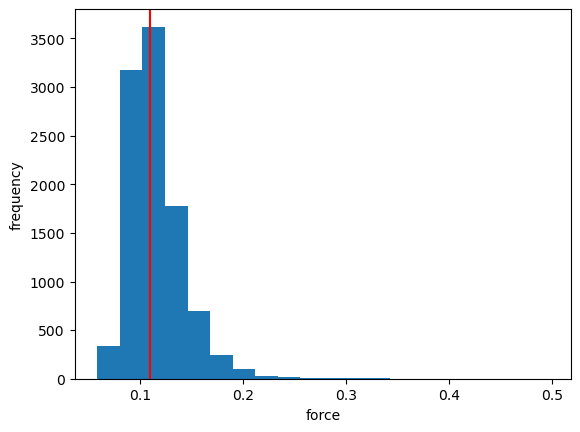

In [34]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.xlabel('force')
plt.ylabel('frequency')
plt.show()

In [35]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m 
v_mc = v 
t_f_mc = t_f + np.random.normal(loc=0.0, scale=t_err_f,size=N)

F_mc = m_mc*(v_mc/t_f_mc)

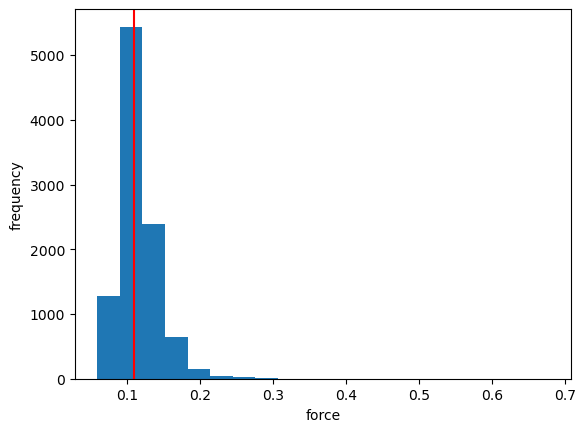

In [36]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.xlabel('force')
plt.ylabel('frequency')
plt.show()

In [37]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m 
v_mc = v + np.random.normal(loc=0.0, scale=v_err,size=N)
t_f_mc = t_f

F_mc = m_mc*(v_mc/t_f_mc)

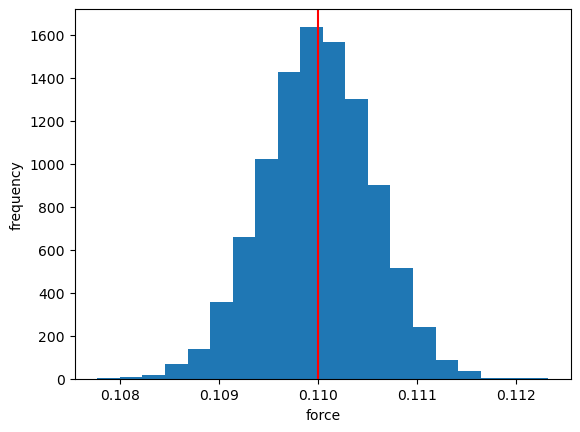

In [38]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.xlabel('force')
plt.ylabel('frequency')
plt.show()

In [39]:
# calculate force
m = 0.055
v = 10
t_f = 5

F = m * (v/t_f)


#uncertainty 
m_err = 0.001
v_err = 0.05
t_err_f = 1 

#number of simulations
N = 10000 

#loc is mean, scale is st deviation
m_mc = m + np.random.normal(loc=0.0, scale=m_err,size=N)
v_mc = v 
t_f_mc = t_f

F_mc = m_mc*(v_mc/t_f_mc)

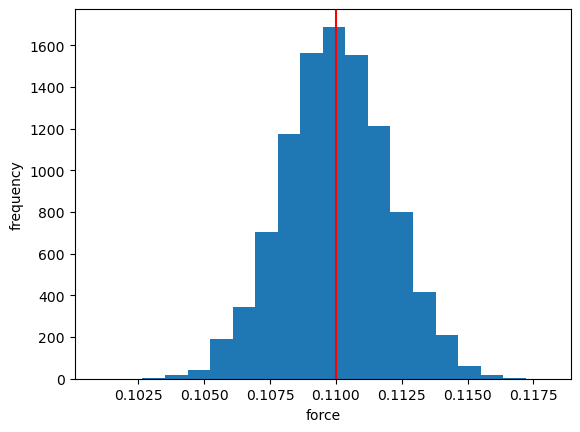

In [40]:
plt.hist(F_mc,bins = 20)
plt.axvline(x = F, color = 'r') #vertical line for exact value
plt.xlabel('force')
plt.ylabel('frequency')
plt.show()

It seems that our measurement for time has the largest effect on the acceleration -- Here we are looking at the "spread" of the horizontal axis of our histograms, where the one with the time perturbation has the largest horizontal range. 

### Application to Deterministic Models

Let's see how measurement uncertainty can affect the solution in deterministic modelling (i.e., differential equations).

We have previously seen the Energy Balance Model when looking at Deterministic Models.  As a reminder, we have 

$$k \frac{dT}{dt} = \pi R^2Q(1-\alpha(T)) - 4 \pi R^2 \sigma \varepsilon T^4,$$

where
- $k$ is the heat capacity of the Earth (J/K)
- $T$ is the temperature of the Earth (K)
- $t$ is the time (s)
- $R$ is the radius of the Earth (m)
- $Q$ is the amount of solar energy that reaches the Earth's surface (s$^{-1}$ m$^{-2}$)
- $\alpha(T)$ is the albedo of the Earth and is unitless
- $\sigma$ is the Stefan-Boltzmann constant (W/(m$^2$K$^4$) ) 
- $\varepsilon$ is the emissivity and is unitless

For the albedo, we had two possible functions (which gave rise to two different Energy Balance Models):
$$\alpha_1(T) = 0.3$$ 
or 
$$\alpha_2(T)=
\begin{cases}
0.7, T \leq 247 K\\
3.52296-0.011429T, 247 < T  < 282 K \\
0.3, T \geq 282 K
\end{cases}$$

We also know the following information about the uncertainty of the constant values:
|Constant| Value|Uncertainty| 
|--------|------|-----------|
|$k$      | $1.0 \times 10^{23}$ J/K| $\pm 0.22 \times 10^{9}$ J/K|
|$R$      | $6.3781 \times 10^6$  m| $\pm 10$ m|
|$Q$      | $1365$    W/(s m$^2$)| $\pm 27.3$ W/(s m$^2$)|
|$\sigma$ | $5.6704 \times 10^{-8}$ W/(m$^2$K$^4$) | $\pm 0.000021 \times 10^{-8}$ W/(m$^2$K$^4$)|

Let's see how to incorporate the uncertainty in to the model and the effects on the solutions.

In [41]:
## Let's look at the energy balance equation with \alpha_1(T) 
eps = 0.622
alpha = 0.3

f = lambda T,t: (np.pi*R**2*Q*(1 - alpha) - 4*np.pi*R**2*eps*sigma*T**4)/k
t = np.linspace(0,1e9,100)

T0 = 267

## generate deterministic solution
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 
T_determin = spi.odeint(f,T0,t)
t_determin = t

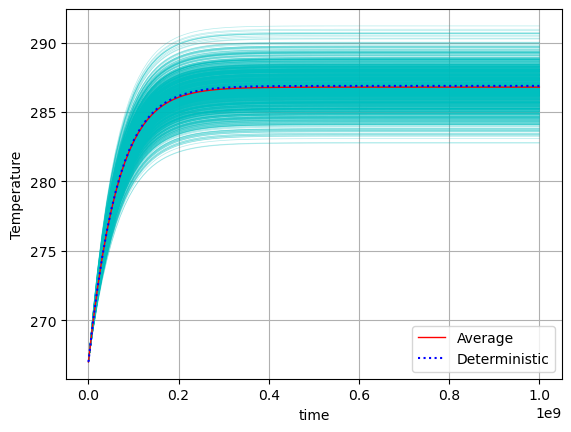

In [42]:
##Uncertainty analysis -- add in the noise to Q, R , K, and sigma
#number of simulations
## this only takes a couple seconds to run
N = 1000 

T_sols = []

for i in range(N):
    Q = 1365 + np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 + np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 + np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 + np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f,T0,t)
    T_sols.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)
    
#convert T_sols to array to find mean -- python stores as list, need array
T_average = np.array(T_sols)

plt.plot(t,T_average.mean(axis=0),'r',linewidth=1,label='Average') 
plt.plot(t_determin,T_determin, ':b',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

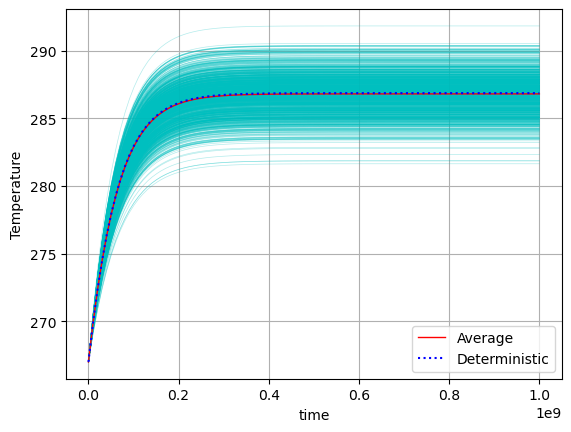

In [43]:
##Uncertainty analysis -- add in the noise to Q, R , K, and sigma
#number of simulations
N = 1000 

T_sols1 = []

for i in range(N):
    Q = 1365 + np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 #+ np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 #+ np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 #+ np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f,T0,t)
    T_sols1.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)
    
#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols1)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average') 
plt.plot(t_determin,T_determin, ':b',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

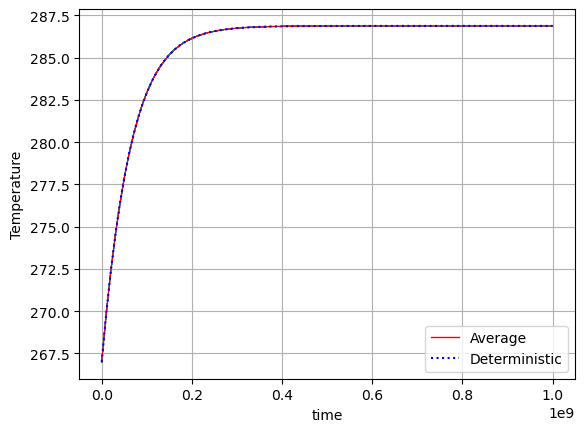

In [44]:
##Uncertainty analysis -- add in the noise to Q, R , K, and sigma
#number of simulations
N = 1000 

T_sols2 = []

for i in range(N):
    Q = 1365 #+ np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 + np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 #+ np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 #+ np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f,T0,t)
    T_sols2.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)
    
#convert T_sols to array to find mean -- python stores as list, need array
T_average2 = np.array(T_sols2)

plt.plot(t,T_average2.mean(axis=0),'r',linewidth=1,label='Average') 
plt.plot(t_determin,T_determin, ':b',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

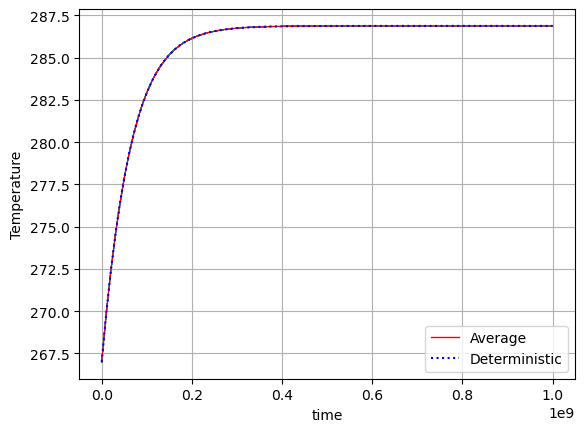

In [18]:
##Uncertainty analysis -- add in the noise to Q, R , K, and sigma
#number of simulations
N = 1000 

T_sols3 = []

for i in range(N):
    Q = 1365 #+ np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 #+ np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 + np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 #+ np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f,T0,t)
    T_sols3.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)
    
#convert T_sols to array to find mean -- python stores as list, need array
T_average3 = np.array(T_sols3)

plt.plot(t,T_average3.mean(axis=0),'r',linewidth=1,label='Average') 
plt.plot(t_determin,T_determin, ':b',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

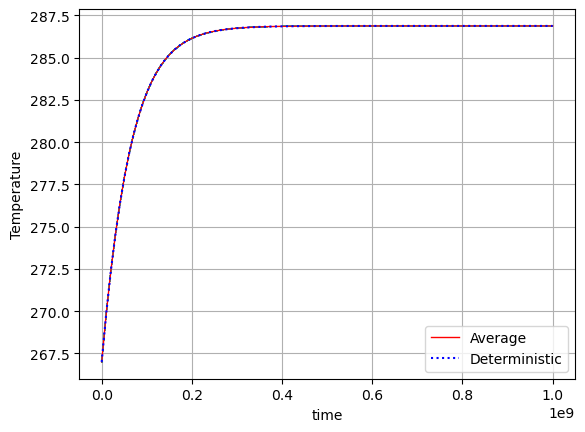

In [19]:
##Uncertainty analysis -- add in the noise to Q, R , K, and sigma
#number of simulations
## this takes a couple of seconds to run
N = 1000 

T_sols4 = []

for i in range(N):
    Q = 1365 #+ np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 #+ np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 #+ np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 + np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f,T0,t)
    T_sols4.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)
    
#convert T_sols to array to find mean -- python stores as list, need array
T_average4 = np.array(T_sols4)

plt.plot(t,T_average4.mean(axis=0),'r',linewidth=1,label='Average') 
plt.plot(t_determin,T_determin, ':b',linewidth=1.5,label='Deterministic')
plt.legend()
plt.grid(True)
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

From the Monte Carlo simulations with uncertainty added to a single parameter, it seems that $Q$, the amount of solar energy that reaches the Earth's surface, is responsible for the variation we are seeing in our Monte Carlo simulation.  This means that variations in the value of $Q$ can affect the outcome of the results. 

In this case, the average of the Monte Carlo simulations is still aligned with the deterministic solution.  So, on average, the results are the same.  The problem arises when we consider this in the context of the problem.  We only have one planet Earth, not $1000$ to average across, so when trying to model the Temperature on Earth, we should be mindful to try to get as accurate of a measurement for $Q$ as possible since this parameter results in a spread of solutions (i.e., the cyan lines). Alternatively, we may try to find a more accurate method for computing the value of $Q$ or we may want to make $Q$ a function of position on the Earth to account for the Earth's tilt and rotation.  The latter would make the model more complex, which in turn makes it more time consuming to solve. 

### Energy Balance Model Uncertainty Analysis

Add uncertainty to the Energy Balance Model with $\alpha_2(T)$. Use an initial temperature of $267$.  How does the result change when $\alpha_1(T)$ is replaced with $\alpha_2(T)$.

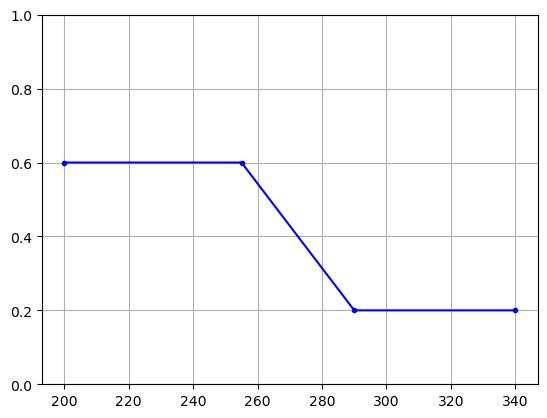

In [20]:
temp = [200,255,290,340]
albedo = [0.6,0.6,0.2,0.2]
plt.plot(temp,albedo,'b.-'), plt.ylim([0,1]), plt.grid(True)
plt.show()

In [21]:
## Deterministic solution
t = np.linspace(0,1e9,100)
alpha = lambda T: np.interp(T,temp,albedo)
f1 = lambda T,t: (np.pi*R**2*Q*(1 - alpha(T)) - 4*np.pi*R**2*eps*sigma*T**4)/k

T0 = 267

## generate deterministic solution
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 
T_determin1 = spi.odeint(f1,T0,t)
t_determin1 = t

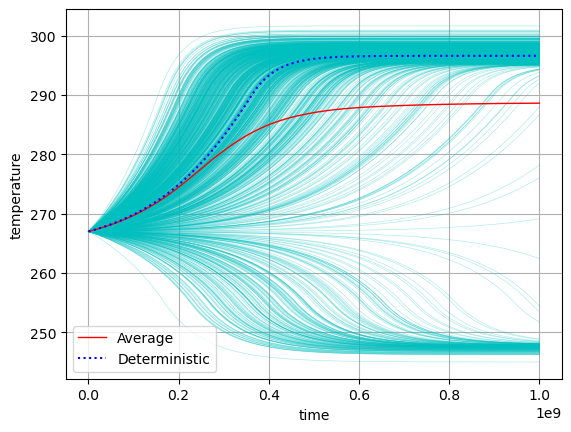

In [22]:
#number of simulations
#This takes about 5s to run with 1000 iterations
N = 1000 

T_sols_a = []

for i in range(N):
    Q = 1365 + np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6 + np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23 + np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 + np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols_a.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_a)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':b',linewidth=1.5,label='Deterministic')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

Notes:
1. When using the $\alpha_2(T)$ function, we see that the uncertainty associated with the measurements has more effect.
2. When we looked at the Energy Balance Model initially, when using $\alpha_2(T)$, we saw that there were $2$ equilibriums when looking at a range of initial $T_0$ values. Interestingly, we see the same type of behaviour here.  The upper bound of $~300$ is preferred, however, we see a nonnegligble number of solutions going down to the lower temperature.
3. The uncertainty with the parameters here appear to have a lot of influence on the Energy Balance Model with $\alpha_2(T)$ used.  Some considerations for improving the model to be less sensitive to these measurements may be needed to achieve good predictions.

Let's try to determine which parameter(s) value is contributing to the variance we see.  In this case, we will run the Monte Carlo simulation with only one parameter's error included at a time, so that we can see how each parameter "controls" the solution.

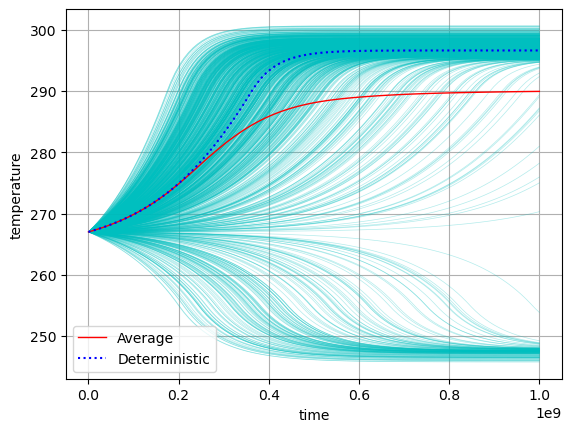

In [23]:
#number of simulations
N = 1000 

T_sols_Q = []

for i in range(N):
    Q = 1365 + np.random.normal(loc=0.0, scale=27.3,size=1)
    R = 6.3781e6
    k = 1e23
    sigma = 5.670374419e-8
    T = spi.odeint(f1,T0,t)
    T_sols_Q.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_Q)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':b',linewidth=1.5,label='Deterministic')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

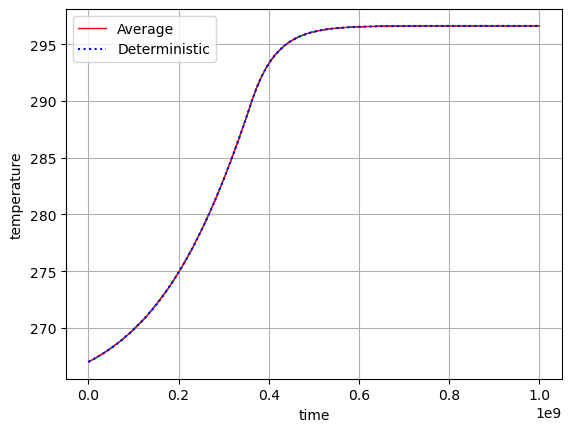

In [24]:
#number of simulations
N = 1000 

T_sols_R = []

for i in range(N):
    Q = 1365
    R = 6.3781e6 + np.random.normal(loc=0.0, scale=10,size=1)
    k = 1e23
    sigma = 5.670374419e-8
    T = spi.odeint(f1,T0,t)
    T_sols_R.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_R)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':b',linewidth=1.5,label='Deterministic')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

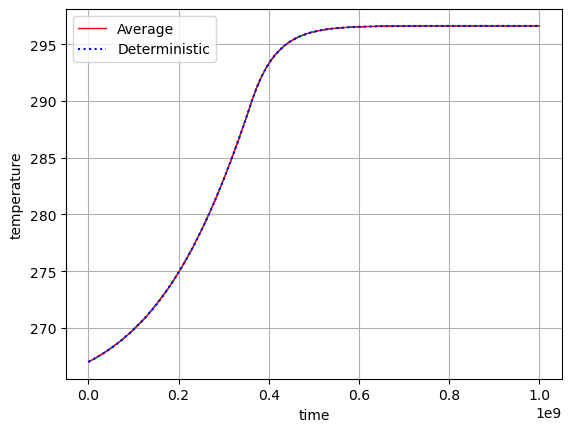

In [25]:
#number of simulations
N = 1000 

T_sols_k = []

for i in range(N):
    Q = 1365
    R = 6.3781e6 
    k = 1e23 + np.random.normal(loc=0.0, scale=0.22e9,size=1)
    sigma = 5.670374419e-8 
    T = spi.odeint(f1,T0,t)
    T_sols_k.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_k)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':b',linewidth=1.5,label='Deterministic')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

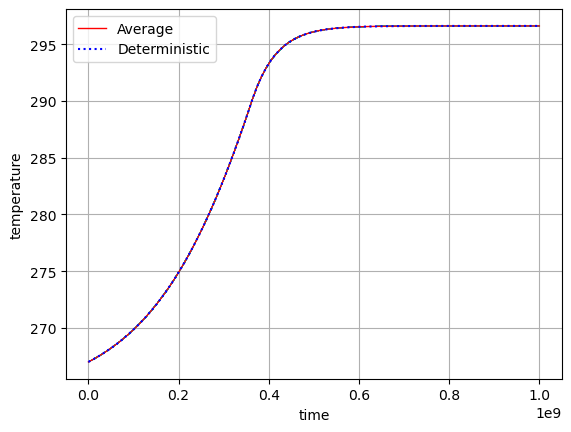

In [26]:
#number of simulations
N = 1000 

T_sols_sig = []

for i in range(N):
    Q = 1365 
    R = 6.3781e6 
    k = 1e23
    sigma = 5.670374419e-8 + np.random.normal(loc=0.0, scale=0.000021e-8,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols_sig.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_sig)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':b',linewidth=1.5,label='Deterministic')
plt.legend()
plt.xlabel('time')
plt.ylabel('temperature')
plt.grid(True)
plt.show()

It appears that $Q$, the amount of solar energy that reaches the Earth's surface, is again responsible for the variation we are seeing in our Monte Carlo simulation, and can heavily affect the outcome of the results. For the Energy Balance Model, this seems to be a key parameter that can affect the qualitative behaviour of solutions, so when simulating this model as a DE model, we should be mindful of the values we are choosing for $Q$.

### Energy Balance Model Uncertainty Analysis 2
Add uncertainty to the Energy Balance Model's initial temperature using $\alpha_2(T)$.  For this task use $267 \pm 1$ K  How does the result change as the uncertainty is increased?

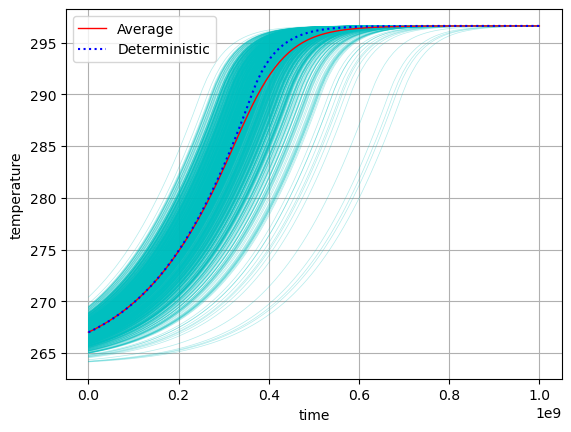

In [27]:
## Deterministic solution
eps = 0.622
Q = 1365 
R = 6.3781e6 
k = 1e23 
sigma = 5.670374419e-8 


t = np.linspace(0,1e9,100)
alpha = lambda T: np.interp(T,temp,albedo)
f1 = lambda T,t: (np.pi*R**2*Q*(1 - alpha(T)) - 4*np.pi*R**2*eps*sigma*T**4)/k

T0 = 267

## generate deterministic solution
T_determin1 = spi.odeint(f1,T0,t)
t_determin1 = t

#number of simulations
N = 1000 

T_sols_a2 = []
Q = 1365
R = 6.3781e6
k = 1e23
sigma = 5.670374419e-8
for i in range(N):
    T0=267 + np.random.normal(loc=0.0, scale=1,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols_a2.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_a2)

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':b',linewidth=1.5,label='Deterministic')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

[[[279.92536881]
  [280.82950929]
  [281.77056958]
  ...
  [296.61296541]
  [296.61296548]
  [296.61296554]]

 [[266.45995891]
  [266.64092981]
  [266.83371166]
  ...
  [296.61286084]
  [296.61287899]
  [296.61289396]]

 [[280.71655219]
  [281.65308285]
  [282.62647188]
  ...
  [296.61296547]
  [296.61296554]
  [296.61296559]]

 ...

 [[269.67950073]
  [270.06237367]
  [270.4680568 ]
  ...
  [296.6129558 ]
  [296.61295762]
  [296.61295911]]

 [[254.81332794]
  [254.22010354]
  [253.69380268]
  ...
  [249.42086993]
  [249.42086042]
  [249.42085183]]

 [[272.24979595]
  [272.78094493]
  [273.34128082]
  ...
  [296.61296257]
  [296.6129631 ]
  [296.61296355]]]
[[266.56707158]
 [266.79449573]
 [267.03196789]
 [267.28120336]
 [267.54248342]
 [267.81456905]
 [268.09553184]
 [268.38366611]
 [268.67797614]
 [268.97749191]
 [269.28203531]
 [269.59087267]
 [269.9026828 ]
 [270.21543902]
 [270.52770656]
 [270.83801306]
 [271.14567324]
 [271.44829152]
 [271.74432626]
 [272.03319595]
 [272.3148152 

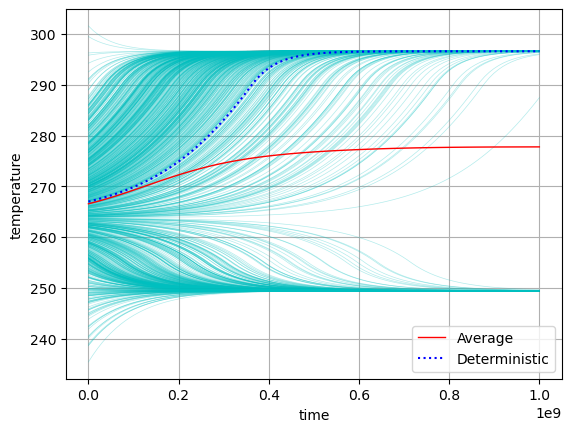

In [ ]:
#number of simulations
N = 1000 

T_sols_a2_T1 = []
Q = 1365
R = 6.3781e6
k = 1e23
sigma = 5.670374419e-8
for i in range(N):
    T0=267 + np.random.normal(loc=0.0, scale=10,size=1)
    T = spi.odeint(f1,T0,t)
    T_sols_a2_T1.append(T)
    plt.plot(t,T,'-c',alpha=0.3,linewidth=0.5)

#convert T_sols to array to find mean -- python stores as list, need array
T_average1 = np.array(T_sols_a2_T1)
print(T_average1)
print(T_average1.mean(axis=0)) 

plt.plot(t,T_average1.mean(axis=0),'r',linewidth=1,label='Average')
plt.plot(t_determin1,T_determin1, ':b',linewidth=1.5,label='Deterministic')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

Remarks:
1. Notice how different initial conditions also result in different quantitative behaviour.
2. When $\alpha$ is a constant, generally, the average of our Monte Carlo simulations is aligned with the deterministic solutions.  But, when we look at the plot for temperature dependent $\alpha(T)$, we see that there is a clear deviation of the average Monte Carlo solution from the deterministic solution.  So, on average, we see a different result from the deterministic solution.
3. Adding a Monte Carlo uncertainty to the initial condition can be a good way to see how different initial condition values may affect the output of the DE.  Recall that finding appropriate initial conditions for differential equations models is challenging, and sometimes we do not know what the appropriate initial conditions should be.
4. In some cases, we may not know the uncertainty value.  In these cases, we generally want can look at $\pm 1\%$ or $\pm 5\%$ of the parameter's value to see the response in the model.  In general, most errors are below $5\%$ (but this is not always the case).

Some questions to think about in relation to the Monte Carlo plots:
- How does the qualitative and quantitative behaviour of the cyan lines compare to the deterministic solution?  What does this mean in terms of the context of the problem?
- What happens if we increase the uncertainty level for each of the parameters? Is there a point where another parameter also contributes to the results?